<a href="https://colab.research.google.com/github/SWASTIK-CHAMOLA/College-AI-ML-LAB/blob/main/LAB7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#lab 7: Implement different techniques of handling imbalanced data.

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Class Distribution (Before Handling):
Category
1    5379
0    2410
Name: count, dtype: int64


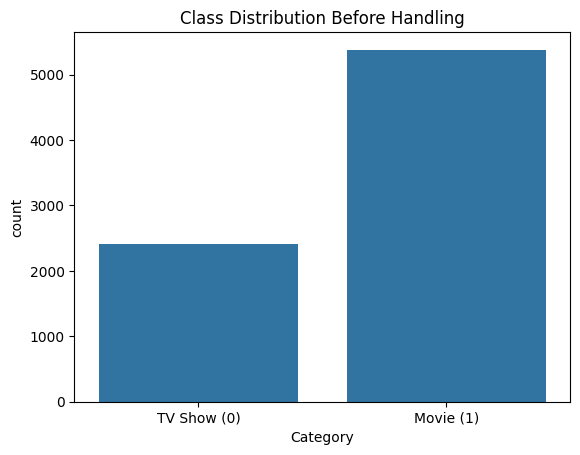

In [6]:
# Lab 7: Handling Imbalanced Data
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------
# Step 1: Load Dataset
# -------------------------------
file_path = "/content/drive/MyDrive/Colab Notebooks/Netflix Dataset.csv"
df = pd.read_csv(file_path)

# Create target variable (Movie = 1, TV Show = 0)
df['Category'] = df['Category'].map({'Movie': 1, 'TV Show': 0})

# Simple feature: Duration (convert to numeric)
def convert_duration(val):
    if "min" in str(val):
        return int(val.replace(" min", ""))
    elif "Season" in str(val):
        return int(val.split()[0]) * 60
    return None

df['Duration_num'] = df['Duration'].apply(convert_duration)

# Drop missing
df = df.dropna(subset=['Duration_num', 'Category'])

X = df[['Duration_num']]
y = df['Category']

print("Class Distribution (Before Handling):")
print(y.value_counts())

sns.countplot(x=y)
plt.title("Class Distribution Before Handling")
plt.xticks([0,1], ['TV Show (0)', 'Movie (1)'])
plt.show()
